# Import Library

In this section, we import all the necessary libraries and tools required for data preprocessing, analysis, and modeling. Each library serves a specific purpose in the workflow:

- **Numpy (`np`)**: Used for numerical computations and handling arrays.
- **Pandas (`pd`)**: Essential for data manipulation and analysis, such as loading, cleaning, and transforming datasets.
- **TensorFlow (`tf`)**: A powerful deep learning framework utilized for building and training machine learning models.
- **Matplotlib (`plt`)**: A plotting library used to create static, interactive, and animated visualizations.
- **Seaborn (`sns`)**: Built on Matplotlib, used for more aesthetically pleasing and informative statistical graphics.
- **Warnings**: Suppresses unnecessary warnings to ensure a clean and readable notebook.
- **Joblib**: Helps in saving and loading Python objects, such as pre-trained models.
- **Keras components (`regularizers`)**: Core modules of TensorFlow used for defining and optimizing neural networks.
- **Scikit-learn tools**:
  - **`StandardScaler`**: Scales numerical data for better model performance.
  - **`KMeans`**: Performs clustering for unsupervised learning tasks.
  - **`train_test_split`**: Splits the data into training and testing subsets.
  - **`compute_class_weight`**: Computes weights for imbalanced classes in classification problems.
- **Pandas Options**:
  - **`display.float`**: Formats floating-point numbers for better readability.
  - **`display.max_columns`**: Ensures all columns in the dataset are visible.
  - **`display.max_rows`**: Enables viewing all rows for thorough inspection.
  - **`display.max_info_columns`**: Limits the number of columns displayed in the `.info()` method.

These libraries collectively provide the foundation for handling and analyzing the dataset, preprocessing data, and building machine learning models effectively.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
warnings.filterwarnings('ignore')
pd.set_option('display.float', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_columns', 50)

# Gathering Data

In this section, the dataset is imported from a specified directory for further analysis. The data serves as the foundation for building and evaluating the models in this project.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bike_df = pd.read_csv('/content/drive/MyDrive/Dataset_CP/motor1.csv')

# Assessing Data

This section involves examining the dataset to understand its structure and identify potential issues. Key activities include:

- Displaying the first few rows of the dataset to observe data patterns and formatting.
- Summarizing the dataset to review column names, data types, and non-null counts.
- Checking the shape of the dataset to understand the number of rows and columns.
- Identifying missing values in each column to handle them appropriately during preprocessing.
- Counting duplicate rows to ensure data integrity and remove redundancies.


In [4]:
# Displays the first 5 rows of the DataFrame `bike_df`
bike_df.head()

price  mileage  power              make_model     date      fuel    gear  \
0  23990      150 218.00                   Honda  03/2020  Gasoline  Manual   
1   7500     2871  90.00            BMW F 800 GT  09/2018  Gasoline  Manual   
2    800     1700   3.00  Nova Motors Retro Star  10/2019  Gasoline     NaN   
3  14990    24345    NaN            Aprilia RSV4  03/2016  Gasoline     NaN   
4   6200    25000 128.00    Kawasaki Ninja ZX-6R  08/2009  Gasoline     NaN   

      offer_type                   version  \
0  Demonstration  CBR1000RR-R Fireblade SP   
1           Used                       NaN   
2           Used                       NaN   
3           Used                        RF   
4           Used                       NaN   

                                                link  
0  /offers/honda-others-cbr1000rr-r-fireblade-sp-...  
1  /offers/bmw-f-800-gt-gasoline-white-f65273c6-6...  
2  /offers/nova-motors-retro-star-gasoline-red-f8...  
3  /offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...  
4  /offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...

In [5]:
# Displays a concise summary of the DataFrame `bike_df`
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [6]:
# Encode 'type_review' to numeric
bike_df.shape

(34917, 10)

In [7]:
# Counts missing values in all columns
bike_df.isna().sum()

price             0
mileage           0
power          6319
make_model        0
date              0
fuel           3190
gear          22070
offer_type        0
version       17504
link              0
dtype: int64

In [8]:
# Counts duplicate rows in the DataFrame
bike_df.duplicated().sum()

5832

# Cleaning Data

This section focuses on ensuring the dataset is clean and ready for analysis and modeling. Key cleaning steps include:

- Handling missing values by filling or replacing them based on the column's characteristics (e.g., mode, median, or default values).
- Removing duplicate rows to maintain data integrity and avoid redundancy.
- Treating outliers in numerical columns to minimize their impact on the model.
- Converting data types where necessary, such as transforming date columns to datetime format and extracting relevant information.
- Standardizing and cleaning categorical and text data, including:
  - Encoding categorical columns for better compatibility with modeling.
  - Removing rows with irrelevant or placeholder values (e.g., "Others" or "Online").
- Renaming columns and creating new features to enhance data usability.
- Ensuring all values meet the desired thresholds and removing rows with invalid entries.

These steps aim to prepare a clean, structured dataset that reflects accurate and meaningful information for further analysis.


In [9]:
# Fills missing 'fuel' values with the mode
bike_df['fuel'].fillna(bike_df['fuel'].mode()[0], inplace=True)

In [10]:
# Fills missing 'power' values with the median
bike_df['power'].fillna(bike_df['power'].median(), inplace=True)

In [11]:
# Fills missing 'gear' values with the mode
bike_df['gear'].fillna(bike_df['gear'].mode()[0], inplace=True)

In [12]:
# Replaces missing 'version' values with a space
bike_df['version'] = bike_df['version'].replace(np.nan, ' ')

In [13]:
# Counts missing values in each column
bike_df.isna().sum()

price         0
mileage       0
power         0
make_model    0
date          0
fuel          0
gear          0
offer_type    0
version       0
link          0
dtype: int64

In [14]:
# Removes duplicate rows from the DataFrame
bike_df.drop_duplicates(inplace=True)

In [15]:
# Returns the shape of the DataFrame `bike_df`
bike_df.shape

(29084, 10)

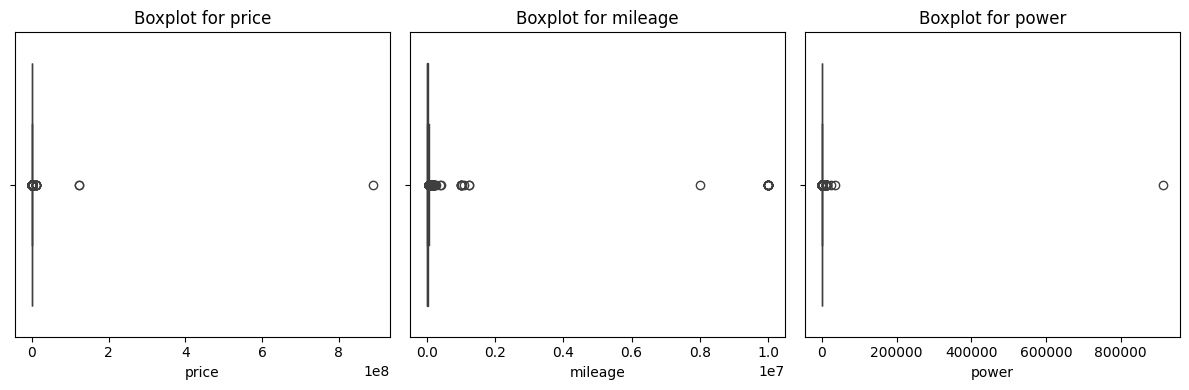

In [16]:
# Defines numerical columns and sets plot size
numerical_columns = ['price', 'mileage', 'power']

plt.figure(figsize=(12, 4))

# Iterate through numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)  # Adjusted to a single row with three columns
    sns.boxplot(x=bike_df[col])
    plt.title(f'Boxplot for {col}')

# Adjusts layout and displays the plots
plt.tight_layout()
plt.show()

In [17]:
# Caps outliers in specified columns within 1.5*IQR range
def impute_boundary_outliers(bike_df, columns):
    for col in columns:
        Q1 = bike_df[col].quantile(0.25)
        Q3 = bike_df[col].quantile(0.75)
        IQR = Q3 - Q1
        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)

        kondisi_lower_than = bike_df[col] < minimum
        kondisi_more_than = bike_df[col] > maximum

        bike_df[col] = bike_df[col].mask(cond=kondisi_more_than, other=maximum)
        bike_df[col] = bike_df[col].mask(cond=kondisi_lower_than, other=minimum)

impute_boundary_outliers(bike_df, ['price', 'mileage', 'power'])
print("The data after boundary value imputation:")
print(bike_df.shape)

The data after boundary value imputation:
(29084, 10)


In [18]:
# Statistical summary of the numerical columns
bike_df.describe()

price   mileage     power
count 29,084.00 29,084.00 29,084.00
mean   9,960.88 16,071.38     86.79
std    5,965.04 16,376.61     48.93
min        1.00      0.00      1.00
25%    6,500.00  2,604.00     54.00
50%    9,000.00 10,587.00     90.00
75%   13,382.50 24,477.50    114.00
max   23,706.25 57,287.75    204.00

In [19]:
# Converts 'date' to datetime and extracts 'year'
bike_df['date'] = pd.to_datetime(bike_df['date'], errors='coerce', format='%m/%Y')
bike_df['year'] = bike_df['date'].dt.year

In [20]:
# Sorts 'year' values in ascending order
bike_df['year'].sort_values(ascending=True)

19177   1,907.00
29766   1,913.00
5336    1,913.00
11160   1,914.00
7392    1,917.00
2627    1,920.00
25003   1,926.00
20343   1,926.00
11530   1,927.00
13245   1,927.00
14709   1,928.00
29196   1,928.00
12723   1,928.00
34844   1,928.00
4363    1,929.00
1318    1,929.00
9327    1,929.00
18022   1,929.00
11417   1,929.00
18182   1,929.00
18855   1,929.00
31072   1,929.00
16320   1,930.00
1157    1,930.00
11331   1,931.00
3562    1,933.00
30646   1,933.00
25800   1,934.00
5445    1,934.00
4221    1,934.00
18440   1,935.00
34727   1,935.00
33249   1,936.00
30331   1,936.00
30970   1,936.00
23685   1,936.00
12843   1,936.00
2925    1,936.00
6725    1,936.00
3438    1,937.00
4474    1,937.00
29854   1,937.00
544     1,937.00
11329   1,937.00
32036   1,937.00
14193   1,938.00
499     1,938.00
14078   1,938.00
3844    1,938.00
14130   1,938.00
31958   1,939.00
30584   1,939.00
28556   1,939.00
25784   1,939.00
23721   1,939.00
15570   1,939.00
16023   1,939.00
6583    1,939.00
27025   1,939.00
12146   1,939.00
2826    1,939.00
34418   1,939.00
8547    1,939.00
5178    1,939.00
21800   1,940.00
18058   1,940.00
5161    1,940.00
4159    1,940.00
1073    1,940.00
32983   1,940.00
11363   1,940.00
8246    1,941.00
8652    1,941.00
2592    1,941.00
387     1,941.00
31025   1,941.00
31018   1,942.00
21118   1,942.00
24528   1,942.00
26585   1,942.00
32922   1,942.00
15840   1,942.00
34840   1,942.00
24786   1,943.00
34875   1,943.00
4440    1,943.00
33918   1,944.00
5177    1,944.00
19039   1,946.00
32115   1,946.00
25101   1,946.00
20239   1,946.00
32892   1,946.00
7764    1,946.00
27941   1,946.00
9381    1,946.00
9375    1,947.00
22442   1,947.00
11706   1,947.00
15383   1,947.00
3780    1,947.00
8405    1,947.00
30473   1,947.00
18372   1,947.00
10301   1,948.00
2433    1,948.00
8946    1,948.00
23251   1,948.00
8696    1,948.00
9409    1,948.00
20454   1,949.00
13414   1,949.00
27270   1,949.00
29605   1,950.00
7851    1,950.00
5850    1,950.00
33311   1,950.00
11945   1,950.00
21135   1,950.00
29241   1,950.00
4033    1,950.00
13493   1,950.00
14343   1,950.00
30409   1,951.00
17188   1,951.00
29918   1,951.00
11027   1,951.00
16802   1,951.00
14066   1,951.00
11729   1,951.00
4721    1,951.00
2482    1,952.00
7259    1,952.00
6898    1,952.00
34835   1,952.00
25969   1,952.00
34323   1,952.00
17028   1,952.00
15404   1,952.00
32147   1,952.00
28271   1,952.00
10060   1,952.00
471     1,952.00
13159   1,952.00
7563    1,953.00
34706   1,953.00
33894   1,953.00
17498   1,953.00
13889   1,953.00
3168    1,953.00
14710   1,953.00
27351   1,953.00
20232   1,953.00
30734   1,953.00
34619   1,953.00
19633   1,954.00
17619   1,954.00
30649   1,954.00
24740   1,954.00
34786   1,954.00
22935   1,954.00
14861   1,954.00
15036   1,954.00
9293    1,954.00
23233   1,954.00
27376   1,954.00
8881    1,954.00
9316    1,954.00
26821   1,955.00
22983   1,955.00
25541   1,955.00
14369   1,955.00
12962   1,955.00
2660    1,955.00
3651    1,955.00
29402   1,955.00
11358   1,955.00
31541   1,955.00
15492   1,955.00
27236   1,955.00
29453   1,955.00
29030   1,955.00
8989    1,955.00
14838   1,955.00
22585   1,955.00
24516   1,955.00
12060   1,955.00
5115    1,955.00
5550    1,956.00
4362    1,956.00
17642   1,956.00
27400   1,956.00
8511    1,956.00
29942   1,956.00
228     1,956.00
20687   1,956.00
1708    1,956.00
2208    1,956.00
22138   1,956.00
16300   1,956.00
24030   1,956.00
2728    1,956.00
30399   1,956.00
2768    1,956.00
12392   1,957.00
19341   1,957.00
8398    1,957.00
15780   1,957.00
11042   1,957.00
14666   1,957.00
122     1,957.00
10421   1,957.00
15985   1,957.00
4983    1,957.00
5892    1,957.00
10432   1,958.00
3040    1,958.00
16126   1,958.00
17252   1,958.00
17633   1,958.00
14497   1,958.00
22256   1,958.00
24339   1,958.00
17593   1,958.00
18894   1,958.00
20669   1,958.00
3392    1,958.00
28806   1,958.00
16093   1,958.00
12737   1,958.00
32621   1,958.00
27908   1,958.00
8647    1,958.00
7118    1,959.00
26386   1,959.00
10668

In [21]:
# Counts missing values in the 'year' column
bike_df['year'].isna().sum()

28

In [22]:
# Drops rows with missing 'year' values
bike_df.dropna(subset=['year'], inplace=True)

In [23]:
# Verifies if missing values in 'year' are eliminated
bike_df['year'].isna().sum()

0

In [24]:
# Displays a concise summary of the DataFrame `bike_df`
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 0 to 34916
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   price       29056 non-null  float64       
 1   mileage     29056 non-null  float64       
 2   power       29056 non-null  float64       
 3   make_model  29056 non-null  object        
 4   date        29056 non-null  datetime64[ns]
 5   fuel        29056 non-null  object        
 6   gear        29056 non-null  object        
 7   offer_type  29056 non-null  object        
 8   version     29056 non-null  object        
 9   link        29056 non-null  object        
 10  year        29056 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 2.7+ MB


In [25]:
# Drops rows where 'year' is less than 1999
bike_df.drop(bike_df[bike_df['year'] < 1999].index, inplace=True)

In [26]:
# Returns the shape of the DataFrame `bike_df`
bike_df.shape

(27442, 11)

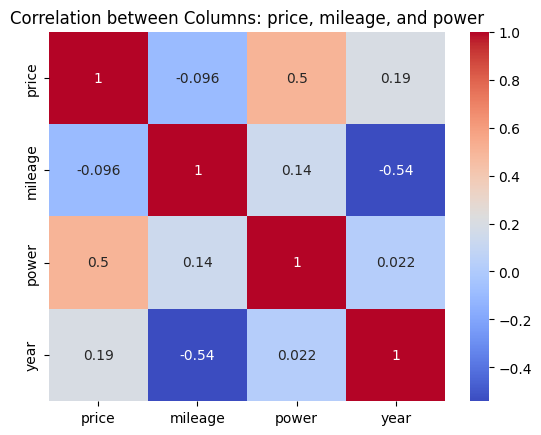

In [27]:
# Plots correlation heatmap for selected columns
selected_columns = ['price','mileage', 'power', 'year']

correlation_matrix = bike_df[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Columns: price, mileage, and power')
plt.show()

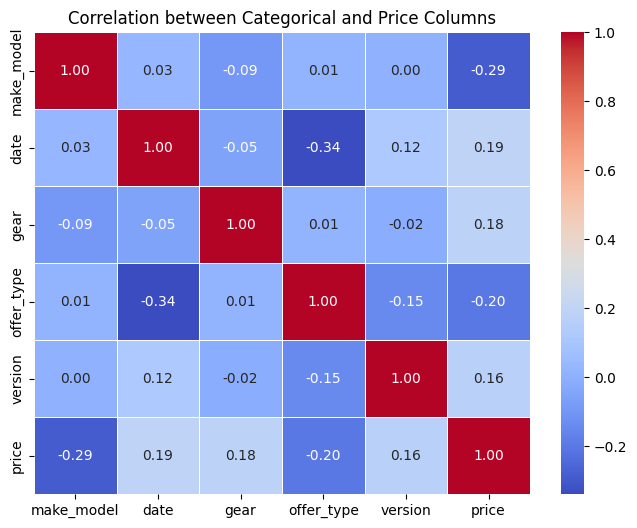

In [28]:
# Encodes categorical columns and plots correlation heatmap
temp_df = bike_df.copy()

label_encoder = LabelEncoder()

temp_df['make_model'] = label_encoder.fit_transform(temp_df['make_model'])
temp_df['date'] = label_encoder.fit_transform(temp_df['date'])
temp_df['gear'] = label_encoder.fit_transform(temp_df['gear'])
temp_df['offer_type'] = label_encoder.fit_transform(temp_df['offer_type'])
temp_df['version'] = label_encoder.fit_transform(temp_df['version'])

selected_columns = ['make_model', 'date', 'gear', 'offer_type', 'version', 'price']

correlation_matrix = temp_df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Categorical and Price Columns')
plt.show()

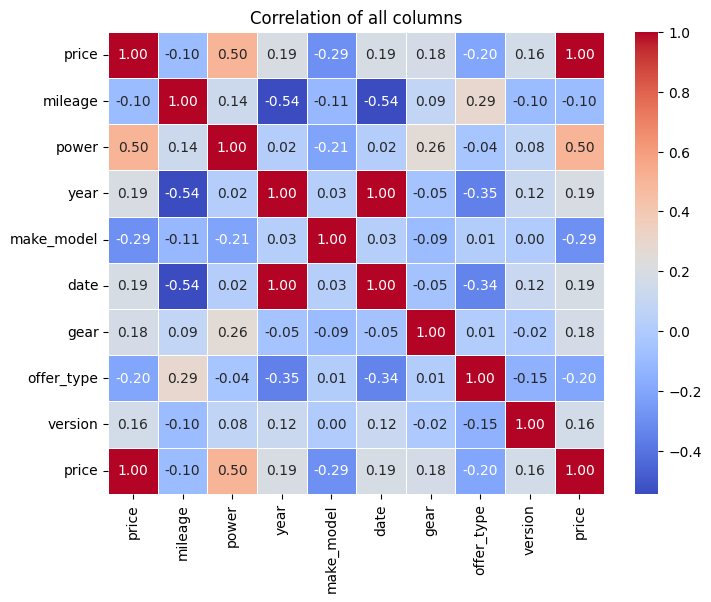

In [29]:
# Plots correlation heatmap for all selected columns
selected_columns = ['price','mileage', 'power', 'year', 'make_model', 'date', 'gear', 'offer_type', 'version', 'price']

correlation_matrix = temp_df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of all columns')
plt.show()

In [30]:
# Converts 'price' to IDR based on year-specific exchange rates
def convert_rp(df, price_column, year_column, exchange_rates):
    for start_year, end_year, exchange_rate in exchange_rates:
        df.loc[(df[year_column] >= start_year) & (df[year_column] <= end_year), price_column] *= exchange_rate
    return df

exchange_rates = [
    (1999, 2005, 9500),
    (2006, 2013, 12000),
    (2014, 2020, 15000),
    (2021, 2022, 16000)
]

bike_df = convert_rp(bike_df, 'price', 'year', exchange_rates)

In [31]:
# Drops specified columns and displays remaining columns
bike_df.drop(columns=['date', 'mileage', 'power', 'offer_type', 'link'], inplace=True)
print(bike_df.columns)

Index(['price', 'make_model', 'fuel', 'gear', 'version', 'year'], dtype='object')


In [32]:
# Displays the first 5 rows of the DataFrame `bike_df`
bike_df.head()

price              make_model      fuel    gear  \
0 355,593,750.00                   Honda  Gasoline  Manual   
1 112,500,000.00            BMW F 800 GT  Gasoline  Manual   
2  12,000,000.00  Nova Motors Retro Star  Gasoline  Manual   
3 224,850,000.00            Aprilia RSV4  Gasoline  Manual   
4  74,400,000.00    Kawasaki Ninja ZX-6R  Gasoline  Manual   

                    version     year  
0  CBR1000RR-R Fireblade SP 2,020.00  
1                           2,018.00  
2                           2,019.00  
3                        RF 2,016.00  
4                           2,009.00

In [33]:
# Renames columns to more descriptive names in Indonesian
bike_df.rename(columns={
    'make_model': 'model',
    'version': 'versi',
    'price': 'harga',
    'gear': 'transmisi',
    'fuel': 'bahan_bakar',
    'year': 'tahun',
}, inplace=True)

In [34]:
# Combines 'model' and 'versi' into 'nama'
bike_df['nama'] = bike_df['model'] + ' ' + bike_df['versi']

In [35]:
# Drops 'versi' and 'model' columns, displays remaining columns
bike_df.drop(columns=['versi', 'model'], inplace=True)
print(bike_df.columns)

Index(['harga', 'bahan_bakar', 'transmisi', 'tahun', 'nama'], dtype='object')


In [36]:
# Calculates 'umur' as 2024 minus 'tahun'
bike_df['umur'] = 2024 - bike_df['tahun']

In [37]:
# Displays the first 5 rows of the DataFrame `bike_df`
bike_df.head()

harga bahan_bakar transmisi    tahun  \
0 355,593,750.00    Gasoline    Manual 2,020.00   
1 112,500,000.00    Gasoline    Manual 2,018.00   
2  12,000,000.00    Gasoline    Manual 2,019.00   
3 224,850,000.00    Gasoline    Manual 2,016.00   
4  74,400,000.00    Gasoline    Manual 2,009.00   

                             nama  umur  
0  Honda CBR1000RR-R Fireblade SP  4.00  
1                  BMW F 800 GT    6.00  
2        Nova Motors Retro Star    5.00  
3                 Aprilia RSV4 RF  8.00  
4          Kawasaki Ninja ZX-6R   15.00

In [38]:
# Drops specified columns and displays remaining columns
bike_df.drop(columns=['umur'], inplace=True)
print(bike_df.columns)

Index(['harga', 'bahan_bakar', 'transmisi', 'tahun', 'nama'], dtype='object')


In [39]:
# Counts the number of duplicate rows
bike_df.duplicated().sum()

2107

In [40]:
# Removes duplicate rows from the DataFrame
bike_df.drop_duplicates(inplace=True)

In [41]:
# Drops the 'tahun' column and displays columns
bike_df.drop(columns=['tahun'], inplace=True)
print(bike_df.columns)

Index(['harga', 'bahan_bakar', 'transmisi', 'nama'], dtype='object')


In [42]:
# Returns the shape of the DataFrame `bike_df`
bike_df.shape

(25335, 4)

In [43]:
# Displays a concise summary of the DataFrame `bike_df`
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25335 entries, 0 to 34916
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   harga        25335 non-null  float64
 1   bahan_bakar  25335 non-null  object 
 2   transmisi    25335 non-null  object 
 3   nama         25335 non-null  object 
dtypes: float64(1), object(3)
memory usage: 989.6+ KB


In [44]:
# Statistical summary of the numerical columns
bike_df.describe()

harga
count      25,335.00
mean  139,256,075.62
std    88,727,447.15
min        12,000.00
25%    83,988,000.00
50%   125,880,000.00
75%   190,500,000.00
max   379,300,000.00

In [45]:
# Filters rows where 'harga' is >= 1,000,000.
bike_df = bike_df[bike_df['harga'] >= 1000000]
bike_df.shape

(25325, 4)

In [46]:
# Displays unique values in the 'nama' column
bike_df['nama'].unique()

array(['Honda CBR1000RR-R Fireblade SP', 'BMW F 800 GT  ',
       'Nova Motors Retro Star  ', ..., 'Big Dog Bulldog  ',
       'Yamaha MT-09 TRACER 900',
       'Triumph Bonneville T100 Black mit Garantie'], dtype=object)

In [47]:
# Cleans 'nama' by removing extra spaces
bike_df['nama'] = bike_df['nama'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [48]:
# Displays rows where 'nama' contains "Others"
print(bike_df[bike_df['nama'].str.contains('Others', case=False, na=False)])

               harga          bahan_bakar  transmisi  \
24     16,500,000.00             Gasoline  Automatic   
229    15,000,000.00             Gasoline     Manual   
337   149,850,000.00             Gasoline     Manual   
392    72,000,000.00               Diesel     Manual   
407    33,750,000.00             Gasoline     Manual   
478   119,985,000.00             Gasoline  Automatic   
508   262,350,000.00             Gasoline     Manual   
613    31,500,000.00             Gasoline     Manual   
679   119,250,000.00             Gasoline     Manual   
704    33,750,000.00             Gasoline     Manual   
1017  322,500,000.00             Gasoline     Manual   
1052  179,985,000.00             Gasoline  Automatic   
1132   19,080,000.00             Electric  Automatic   
1153   97,425,000.00             Electric  Automatic   
1407  202,350,000.00             Gasoline     Manual   
1564    1,235,000.00  Two Stroke Gasoline     Manual   
1796  118,350,000.00               Others     Ma

In [49]:
# Counts rows with 'nama' containing "Others"
print(f"Number of names containing 'Others': {bike_df['nama'].str.contains('Others', case=False, na=False).sum()}")

Number of names containing 'Others': 304


In [50]:
# Removes rows where 'nama' contains "Others"
bike_df = bike_df[~bike_df['nama'].str.contains('Others', case=False, na=False)]
bike_df.shape

(25021, 4)

In [51]:
# Displays rows where 'nama' contains "Online"
print(bike_df[bike_df['nama'].str.contains('Online', case=False, na=False)])

               harga bahan_bakar  transmisi  \
49    107,250,000.00    Gasoline     Manual   
942    14,250,000.00    Gasoline     Manual   
20614  47,200,000.00    Gasoline     Manual   
23074  23,250,000.00    Gasoline     Manual   
24428  35,200,000.00    Gasoline     Manual   
26835 123,200,000.00    Gasoline  Automatic   

                                             nama  
49                                         Online  
942                                   Online tapo  
20614  Online Pista 125 ccm 476Km EZ 06.2021*Neu*  
23074                                      Online  
24428                                      Online  
26835                        Online X 9.0 4x4 LOF  


In [52]:
# Counts rows with 'nama' containing "Online"
print(f"Number of names containing 'Online' {bike_df['nama'].str.contains('Online', case=False, na=False).sum()}")

Number of names containing 'Online' 6


In [53]:
# Removes rows where 'nama' contains "Online"
bike_df = bike_df[~bike_df['nama'].str.contains('Online', case=False, na=False)]
bike_df.shape

(25015, 4)

In [54]:
# Display rows with the value 'Others' in the fuel column
print(bike_df[bike_df['bahan_bakar'] == 'Others'])

               harga bahan_bakar  transmisi  \
112    23,655,000.00      Others     Manual   
782   239,985,000.00      Others     Manual   
1079  217,350,000.00      Others     Manual   
1119  162,750,000.00      Others     Manual   
1260   79,705,000.00      Others     Manual   
1543   71,868,000.00      Others     Manual   
1911   17,850,000.00      Others     Manual   
2237   97,350,000.00      Others     Manual   
2335  287,824,000.00      Others     Manual   
2545  355,593,750.00      Others     Manual   
2733  104,850,000.00      Others  Automatic   
2876  153,000,000.00      Others  Automatic   
3192  262,240,000.00      Others     Manual   
3219  203,200,000.00      Others     Manual   
3697   79,080,000.00      Others     Manual   
3830  179,850,000.00      Others     Manual   
4245   22,800,000.00      Others  Automatic   
4310   94,335,000.00      Others     Manual   
4434  202,335,000.00      Others     Manual   
4864  123,405,000.00      Others     Manual   
5098  187,500

In [55]:
# Display the number of rows with the value 'Others'
print(bike_df[bike_df['bahan_bakar'] == 'Others'].shape[0])

127


In [56]:
# Delete rows with the value 'Others' in the fuel column
bike_df.drop(bike_df[bike_df['bahan_bakar'] == 'Others'].index, inplace=True)
bike_df.shape

(24888, 4)

In [57]:
# Displays a concise summary of the DataFrame `bike_df`
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24888 entries, 0 to 34916
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   harga        24888 non-null  float64
 1   bahan_bakar  24888 non-null  object 
 2   transmisi    24888 non-null  object 
 3   nama         24888 non-null  object 
dtypes: float64(1), object(3)
memory usage: 972.2+ KB


In [58]:
# Statistical summary of the numerical columns
bike_df.describe()

harga
count      24,888.00
mean  139,753,889.81
std    88,315,381.80
min     1,080,000.00
25%    84,000,000.00
50%   126,000,000.00
75%   191,200,000.00
max   379,300,000.00

# Save a Clean Dataset

In this section, the cleaned dataset is saved to a CSV file for future use. This ensures that the processed data can be easily accessed and utilized without needing to repeat the data cleaning steps. The saved dataset serves as a reliable foundation for analysis, visualization, and modeling.


In [ ]:
# Saves DataFrame to CSV file
bike_df.to_csv('motor_clean.csv', index=False)
print("Data saved successfully")

Data saved successfully


# Load Clean Dataset

This section involves loading the cleaned dataset into the environment. The cleaned data is ready for analysis and modeling, with all preprocessing steps already completed.

In [ ]:
sepeda_motor = pd.read_csv('/content/drive/MyDrive/Dataset_CP/motor_clean.csv')

# Preprocessing

This section prepares the data for machine learning tasks by applying the following steps:

- **Encoding Categorical Data**:
  - Converts categorical variables (e.g., fuel type, transmission type) into numerical formats using `LabelEncoder` for better compatibility with machine learning algorithms.
- **Normalizing Numerical Data**:
  - Scales numerical data (e.g., price) using `StandardScaler` to ensure features have a consistent scale.
- **Saving Preprocessing Tools**:
  - Stores the encoders and scaler objects in a file (`scaler_motor.pkl`) for reuse in future predictions.
- **Clustering with KMeans**:
  - Groups the data into 10 clusters based on normalized price, fuel type, and transmission type.
  - Filters clusters to ensure each has sufficient data points for meaningful analysis.
- **Splitting Data**:
  - Divides the dataset into training and testing subsets for model evaluation.
- **Computing Class Weights**:
  - Calculates weights for imbalanced classes to improve model training performance.

These preprocessing steps ensure the data is well-structured and ready for training and evaluation.


In [61]:
# Encode categorical data
fuel_encoder = LabelEncoder()
sepeda_motor['bahan_bakar_encoded'] = fuel_encoder.fit_transform(sepeda_motor['bahan_bakar'])

transmission_encoder = LabelEncoder()
sepeda_motor['transmisi_encoded'] = transmission_encoder.fit_transform(sepeda_motor['transmisi'])

In [62]:
# Normalization of numeric data
scaler = StandardScaler()
sepeda_motor['harga_normalized'] = scaler.fit_transform(sepeda_motor[['harga']])

In [63]:
# Keep LabelEncoder and Scaler in one file
joblib.dump({
    'fuel_encoder': fuel_encoder,
    'transmission_encoder': transmission_encoder,
    'scaler': scaler
}, 'scaler_motor.pkl')

['scaler_motor.pkl']

In [64]:
# Clustering with KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
sepeda_motor['cluster'] = kmeans.fit_predict(sepeda_motor[['harga_normalized', 'bahan_bakar_encoded', 'transmisi_encoded']])

In [65]:
# Save KMeans model
joblib.dump(kmeans, 'kmeans_motor.pkl')

['kmeans_motor.pkl']

In [66]:
# Filter clusters with enough data
cluster_counts = sepeda_motor['cluster'].value_counts()
valid_clusters = cluster_counts[cluster_counts > 1].index
sepeda_motor = sepeda_motor[sepeda_motor['cluster'].isin(valid_clusters)]

In [67]:
# Split features and labels
features = sepeda_motor[['harga_normalized', 'bahan_bakar_encoded', 'transmisi_encoded']].values
labels = sepeda_motor['cluster'].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

In [69]:
# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Modelling

This section involves building, training, and evaluating a Neural Network model for clustering and recommendation tasks:

- **Model Architecture**:
  - A Sequential Neural Network is designed with:
    - Input layer based on the features.
    - Hidden layers with `relu` activation, batch normalization, dropout for regularization, and L2 regularization.
    - Output layer with `softmax` activation for multi-class classification (clustering).

- **Model Compilation**:
  - The model is compiled using:
    - Adam optimizer with a learning rate of 0.0001.
    - Sparse categorical cross-entropy as the loss function.
    - Accuracy as the evaluation metric.

- **Callbacks**:
  - Early stopping to terminate training when validation loss doesn't improve for 10 epochs.
  - Learning rate scheduler to reduce learning rate on plateau.

- **Training**:
  - The model is trained using the preprocessed data, with validation and class weights to handle imbalanced clusters.

- **Evaluation**:
  - The model's performance is evaluated on the test dataset to obtain test loss and accuracy.

- **Visualization**:
  - Training and validation accuracy and loss are plotted to assess model convergence and performance over epochs.

- **Recommendation System**:
  - A function is implemented to recommend motorcycles based on a user's budget.
  - Recommendations are filtered by a specified budget range, sorted by price, and displayed with the decoded fuel type and transmission.

This step combines machine learning and business logic to deliver actionable insights and recommendations.


In [70]:
# Build Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_clusters, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,186 (39.79 KB)

 Trainable params: 9,802 (38.29 KB)

 Non-trainable params: 384 (1.50 KB)

In [71]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6)

In [72]:
# Train Neural Network
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    class_weight=class_weight_dict,
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2744 - loss: 2.5062 - val_accuracy: 0.9337 - val_loss: 1.2768 - learning_rate: 1.0000e-04
Epoch 2/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7325 - loss: 1.2497 - val_accuracy: 0.9493 - val_loss: 0.9476 - learning_rate: 1.0000e-04
Epoch 3/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7967 - loss: 1.0221 - val_accuracy: 0.9837 - val_loss: 0.7770 - learning_rate: 1.0000e-04
Epoch 4/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8320 - loss: 0.8595 - val_accuracy: 0.9736 - val_loss: 0.6633 - learning_rate: 1.0000e-04
Epoch 5/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8516 - loss: 0.7448 - val_accuracy: 0.9749 - val_loss: 0.5677 - learning_rate: 1.0000e-04
Epoch 6/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8672 - loss: 0.6445 - val_accuracy: 0.9809 - val_loss: 0.5029 - learning_rate: 1.0000e-04
Epoch 7/100
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 6s

# Result and Evaluation Model

This section evaluates the performance of the trained Neural Network model and visualizes its training process:

- **Evaluation Metrics**:
  - The model achieved a **test accuracy of 98.46%** and a **test loss of 0.08**, indicating high performance on the test dataset.

- **Training Results Visualization**:
  - **Accuracy Plot**:
    - Shows the progression of training and validation accuracy over epochs.
    - Indicates steady improvement in accuracy with minimal overfitting.
  - **Loss Plot**:
    - Displays the reduction in training and validation loss over epochs.
    - Suggests effective learning with a smooth convergence.

These results demonstrate the model's strong predictive capability and its robustness on unseen data, validated by consistent performance across training, validation, and testing datasets.


In [73]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0845
Test Loss: 0.08464252203702927, Test Accuracy: 0.9851346015930176


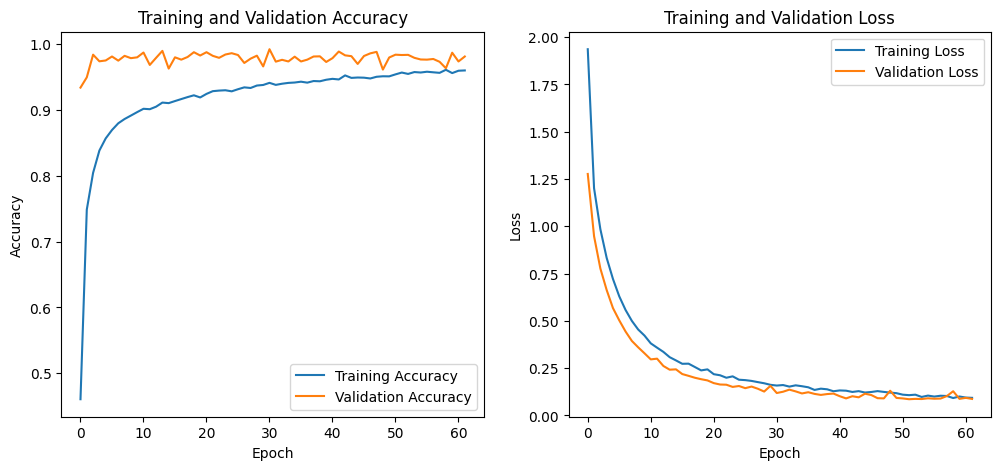

In [74]:
# Plot Training Results
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Prediction

This section focuses on implementing a recommendation system to predict and suggest motorcycles based on a user's budget:

- **Recommendation Function**:
  - Filters motorcycles within a specified budget range (with adjustable tolerance).
  - Sorts recommendations by price and selects the top N options.
  - Decodes categorical values (e.g., fuel type and transmission) to human-readable labels.
  - Returns a DataFrame containing the recommended motorcycles with their details.

- **User Interaction**:
  - Users input their budget, and the system provides a list of motorcycles that fit within the budget range.
  - If no motorcycles match the budget, an appropriate message is displayed.

This feature enables personalized recommendations, helping users make informed decisions based on their financial preferences.


In [75]:
# Motorcycle Recommendations
def recommend_motor(budget, tolerance=0.1, top_n=5):
    """
    Fungsi untuk merekomendasikan motor berdasarkan budget.
    """
    min_price = budget * (1 - tolerance)
    max_price = budget * (1 + tolerance)

    # Filter data by price
    recommendations = sepeda_motor[(sepeda_motor['harga'] >= min_price) & (sepeda_motor['harga'] <= max_price)]

    if not recommendations.empty:
        recommendations = recommendations.sort_values(by='harga').head(top_n)
        recommendations['bahan_bakar'] = fuel_encoder.inverse_transform(recommendations['bahan_bakar_encoded'])
        recommendations['transmisi'] = transmission_encoder.inverse_transform(recommendations['transmisi_encoded'])
        return recommendations[['nama', 'bahan_bakar', 'transmisi', 'harga']]
    else:
        return pd.DataFrame(columns=['nama', 'bahan_bakar', 'transmisi', 'harga'])

# Example of using recommendations
example_budget = float(input("Masukkan anggaran Anda (dalam IDR): "))
recommendations = recommend_motor(example_budget)

if not recommendations.empty:
    print("\nRekomendasi Sepeda Motor yang Sesuai dengan Budget Anda:")
    print(recommendations)
else:
    print("Tidak ada motor yang sesuai dengan anggaran Anda.")

Masukkan anggaran Anda (dalam IDR): 20000000

Rekomendasi Sepeda Motor yang Sesuai dengan Budget Anda:
                        nama          bahan_bakar transmisi         harga
5          Aprilia Mojito 50             Gasoline    Manual 18,000,000.00
11103  Italjet Jet - Set 125             Gasoline    Manual 18,000,000.00
11342          Aprilia RS 50  Two Stroke Gasoline    Manual 18,000,000.00
11560         Peugeot Kisbee             Gasoline    Manual 18,000,000.00
11597          Kymco Like 50             Gasoline    Manual 18,000,000.00


# Save Model

In this section, the trained Neural Network model is saved in multiple formats for future use:

- **H5 Format**: Saves the model architecture, weights, and training configuration in a single file for compatibility with various platforms.
- **Keras Format**: Stores the model in TensorFlow's preferred format for enhanced flexibility and scalability.

These saved models ensure that the training process does not need to be repeated and can be easily deployed or reused in different environments.


In [76]:
# Saves model to h5
model.save("sepedamotor_fix.h5")
print("Model saved successfully in h5")

Model saved successfully in h5


In [77]:
# Saves model to keras
model.save("sepedamotor_fix.keras")
print("Model saved successfully in keras")

Model saved successfully in keras
